# Customer Churn prediction using Logistic Regression

## Data Reading and Preprocessing

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler

df=pd.read_csv("ChurnData.csv")

df=df[['tenure','age','income','ed','employ','equip','custcat','churn']]

X=df[['tenure','age','income','ed','employ','equip','custcat']]
y=df['churn'].astype('int')



scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.13518441, -0.62595491,  0.4751423 , ..., -0.58477841,
        -0.85972695,  1.41630855],
       [-0.11604313, -0.62595491, -0.32886061, ..., -1.14437497,
        -0.85972695, -1.36987221],
       [-0.57928917, -0.85594447, -0.35227817, ..., -0.92053635,
        -0.85972695,  0.48758163],
       ...,
       [-1.36680743, -0.7026181 , -0.21957866, ..., -0.02518185,
        -0.85972695,  0.48758163],
       [-0.53296457, -0.85594447, -0.39130744, ..., -0.58477841,
        -0.85972695,  1.41630855],
       [ 1.18104577,  0.67731925,  0.89665839, ...,  1.31784991,
         1.16316   , -0.44114529]])

## Train and Test split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Model Fitting

In [16]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(C=0.01,solver='liblinear')
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
probability=model.predict_proba(X_test)
print("index \t 0 \t\t\t 1 \t\t\t yhat \t actaul y")
for i in range(len(probability)):
    print(i,'\t',probability[i][0],'\t',probability[i][1],'\t',y_pred[i],'\t',y_test.iloc[i])

index 	 0 			 1 			 yhat 	 actaul y
0 	 0.5754576875029446 	 0.42454231249705543 	 0 	 0
1 	 0.6444481569071192 	 0.35555184309288085 	 0 	 0
2 	 0.5212720601865922 	 0.4787279398134078 	 0 	 1
3 	 0.4838463676788759 	 0.5161536323211241 	 1 	 0
4 	 0.5070816165213589 	 0.49291838347864114 	 0 	 0
5 	 0.5293512934779077 	 0.47064870652209234 	 0 	 0
6 	 0.5284078369698467 	 0.4715921630301533 	 0 	 0
7 	 0.4576521877103368 	 0.5423478122896632 	 1 	 1
8 	 0.4838822422971042 	 0.5161177577028958 	 1 	 1
9 	 0.7290505961329143 	 0.2709494038670857 	 0 	 0
10 	 0.5251416407736984 	 0.4748583592263016 	 0 	 0
11 	 0.47976801986500384 	 0.5202319801349962 	 1 	 1
12 	 0.5558887724384616 	 0.44411122756153837 	 0 	 0
13 	 0.4007809430221302 	 0.5992190569778698 	 1 	 1
14 	 0.6334358324610183 	 0.36656416753898174 	 0 	 0
15 	 0.5473762375910118 	 0.45262376240898816 	 0 	 0
16 	 0.6861651166569854 	 0.31383488334301457 	 0 	 0
17 	 0.44186654047543095 	 0.558133459524569 	 1 	 0
18 	 0.4118

## Evaluation

In [19]:
from sklearn.metrics import jaccard_score, confusion_matrix, log_loss
print(jaccard_score(y_test,y_pred))
print(log_loss(y_test,y_pred))

0.5
7.20873067782343


## Full code

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score, confusion_matrix, log_loss

df=pd.read_csv("ChurnData.csv")

df=df[['tenure','age','income','ed','employ','equip','custcat','churn']]

X=df[['tenure','age','income','ed','employ','equip','custcat']]
y=df['churn'].astype('int')



scaler=StandardScaler()
X=scaler.fit_transform(X)
X

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model= LogisticRegression(C=0.01,solver='liblinear')
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
probability=model.predict_proba(X_test)
print("index \t 0 \t\t\t 1 \t\t\t yhat \t actaul y")
for i in range(len(probability)):
    print(i,'\t',probability[i][0],'\t',probability[i][1],'\t',y_pred[i],'\t',y_test.iloc[i])

print(jaccard_score(y_test,y_pred))
print(log_loss(y_test,y_pred))


index 	 0 			 1 			 yhat 	 actaul y
0 	 0.5221953714163481 	 0.47780462858365197 	 0 	 0
1 	 0.6826340665857631 	 0.31736593341423686 	 0 	 0
2 	 0.5012170614340393 	 0.4987829385659607 	 0 	 0
3 	 0.4321143304144317 	 0.5678856695855683 	 1 	 1
4 	 0.5515546669581343 	 0.44844533304186573 	 0 	 0
5 	 0.5873633067025377 	 0.4126366932974623 	 0 	 0
6 	 0.4174279808239765 	 0.5825720191760235 	 1 	 1
7 	 0.6481673197424986 	 0.3518326802575013 	 0 	 0
8 	 0.5818900011790449 	 0.4181099988209551 	 0 	 0
9 	 0.596527854684211 	 0.403472145315789 	 0 	 1
10 	 0.560760322319642 	 0.43923967768035804 	 0 	 1
11 	 0.6177149614698527 	 0.3822850385301473 	 0 	 1
12 	 0.5297327724228982 	 0.4702672275771019 	 0 	 0
13 	 0.5431308683362825 	 0.4568691316637174 	 0 	 0
14 	 0.5226767702694657 	 0.4773232297305343 	 0 	 1
15 	 0.4588440178682047 	 0.5411559821317953 	 1 	 0
16 	 0.46452518810310595 	 0.535474811896894 	 1 	 0
17 	 0.5039262252785701 	 0.4960737747214298 	 0 	 1
18 	 0.468941109083

index 	 yhat 	 actaul y
0 	 0 	 0
1 	 0 	 0
2 	 1 	 0
3 	 0 	 1
4 	 0 	 0
5 	 0 	 0
6 	 0 	 0
7 	 0 	 0
8 	 0 	 0
9 	 0 	 1
10 	 0 	 1
11 	 0 	 0
12 	 0 	 0
13 	 0 	 0
14 	 0 	 0
15 	 0 	 0
16 	 1 	 0
17 	 0 	 0
18 	 0 	 0
19 	 0 	 0
20 	 0 	 0
21 	 1 	 1
22 	 1 	 0
23 	 0 	 1
24 	 0 	 0
25 	 1 	 0
26 	 0 	 0
27 	 0 	 0
28 	 1 	 0
29 	 0 	 1
30 	 0 	 0
31 	 0 	 0
32 	 0 	 1
33 	 0 	 0
34 	 0 	 0
35 	 0 	 0
36 	 0 	 1
37 	 0 	 0
38 	 0 	 1
39 	 0 	 0


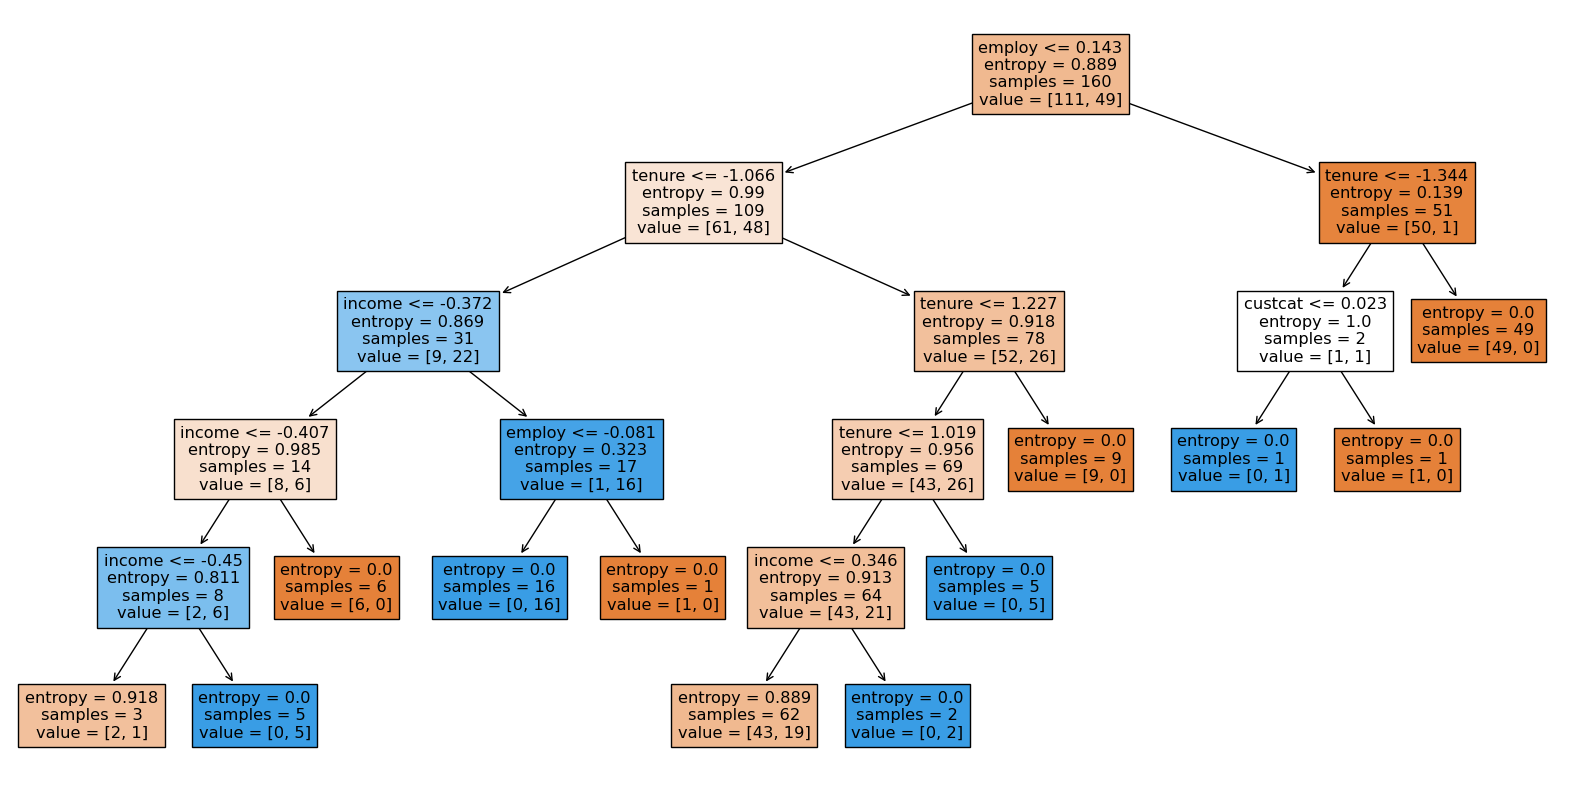

0.07142857142857142
11.714187351463076


In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score, confusion_matrix, log_loss

df=pd.read_csv("ChurnData.csv")

df=df[['tenure','age','income','ed','employ','equip','custcat','churn']]

X=df[['tenure','age','income','ed','employ','equip','custcat']]
y=df['churn'].astype('int')



scaler=StandardScaler()
X=scaler.fit_transform(X)
X

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model= DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("index \t yhat \t actaul y")
for i in range(len(probability)):
    print(i,'\t',y_pred[i],'\t',y_test.iloc[i])


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=['tenure','age','income','ed','employ','equip','custcat'],filled=True)
plt.show()

print(jaccard_score(y_test,y_pred))
print(log_loss(y_test,y_pred))


In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score, confusion_matrix, log_loss

df=pd.read_csv("ChurnData.csv")

df=df[['tenure','age','income','ed','employ','equip','custcat','churn']]

X=df[['tenure','age','income','ed','employ','equip','custcat']]
y=df['churn'].astype('int')



scaler=StandardScaler()
X=scaler.fit_transform(X)
X

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model2= KNeighborsClassifier(n_neighbors=4)
model2.fit(X_train,y_train)

y_pred=model2.predict(X_test)

print(jaccard_score(y_test,y_pred))
print(log_loss(y_test,y_pred))


0.16666666666666666
9.010913347279288
